# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd # manipulación de datos
import numpy as np # operaciones matemáticos
import matplotlib.pyplot as plt # visualización
import scipy.stats as st # estadística
import seaborn as sns
import statsmodels.api as sm

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents.

In [2]:
data = pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles.csv")
df = data.copy()


Examine the `salaries` dataset using the `head` function below.

In [3]:
df.head(5)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
df.isnull().sum()


Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
df["Salary or Hourly"].value_counts()

Salary or Hourly
Salary    25161
Hourly     8022
Name: count, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
df["Department"].value_counts()



Department
POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

H0: u = $30/hr

In [7]:
df2 = df.dropna(subset=['Hourly Rate'])

In [8]:
df2["Hourly Rate"]

4        19.86
6        46.10
7        35.60
10        2.65
18       17.68
         ...  
33164    46.10
33168    17.68
33169    35.60
33174    46.35
33175    48.85
Name: Hourly Rate, Length: 8022, dtype: float64

In [9]:
hourly_rates = df2["Hourly Rate"].values
t_statistic, p_value = st.ttest_1samp(hourly_rates, 30)
t_statistic, p_value

(20.6198057854942, 4.3230240486229894e-92)

In [10]:
p_value

4.3230240486229894e-92

In [11]:
alpha = 0.05

In [12]:
if p_value < alpha:
    print("Reject the null hypothesis. The hourly wage is significantly different from $30/hr.")
else:
    print("Fail to reject the null hypothesis. The hourly wage is not significantly different from $30/hr.")

Reject the null hypothesis. The hourly wage is significantly different from $30/hr.


In [13]:
#Other way

degrees_of_freedom = len(df2["Hourly Rate"])-1
value_t_critico = st.t.ppf(1 - alpha / 2, degrees_of_freedom)
value_t_critico

1.9602597859561675

In [14]:
#Other way:

if abs(t_statistic) > value_t_critico:
     print("Reject null hypothesis: The hourly wage of all hourly workers is significantly different from $30/hr.")
else:
    print("Fail to reject null hypothesis: The hourly wage of all hourly workers is not significantly different from $30/hr.")

Reject null hypothesis: The hourly wage of all hourly workers is significantly different from $30/hr.


We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

Ho: u = 86000/year u > df["Annual_Salary"].mean()



In [15]:
df3 = df.dropna(subset=['Annual Salary'])
annual_salary = df3["Annual Salary"]
t_statistic, p_value = st.ttest_1samp(annual_salary, 86000, alternative ="greater") #Attribute alternative give a one-tail-test adjustment.
t_statistic, p_value

(5.932870515690814, 1.507879259958193e-09)

In [16]:
p_value

1.507879259958193e-09

In [17]:
alpha = 0.05

In [18]:
if p_value < alpha:
    print("Reject the null hypothesis. The current annual mean salary is higher than 86000$.")
else:
    print("Fail to reject the null hypothesis. The current annual mean salary is lower than 86000$.")

Reject the null hypothesis. The current annual mean salary is higher than 86000$.


Using the `crosstab` function, find the department that has the most hourly workers. 

In [19]:
crosstab_dep_workers = pd.crosstab(df['Department'], df['Salary or Hourly'])
crosstab_dep_workers.sort_values("Hourly", ascending = False)

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829
AVIATION,1082,547
GENERAL SERVICES,765,215
TRANSPORTN,725,415
PUBLIC LIBRARY,299,716
FAMILY & SUPPORT,287,328
CITY COUNCIL,64,347


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

H0: u< 35/Hour 

df["Hourly rate"] =u

In [20]:
df4=df[df["Department"]== "STREETS & SAN"]

In [21]:
df4 = df4.dropna(subset=['Hourly Rate'])

In [22]:
t_statistic, p_value = st.ttest_1samp(df4['Hourly Rate'], 35, alternative ="less")
t_statistic, p_value

(-9.567447887848152, 1.6689265282353859e-21)

In [23]:
p_value

1.6689265282353859e-21

In [24]:
alpha = 0.05

In [25]:
if p_value < alpha:
    print("Reject the null hypothesis.The hourly wage is  significantly different from $35/hr.")
else:
    print("Fail to reject the null hypothesis. The hourly wage is not significantly different from $35/hr.")

Reject the null hypothesis.The hourly wage is  significantly different from $35/hr.


In [26]:
if t_statistic < 0:
    print("Reject the null hypothesis.The hourly wage is  significantly lower than $35/hr.")
else:
    print("Fail to reject the null hypothesis. The hourly wage is not significantly different from $35/hr.")

Reject the null hypothesis.The hourly wage is  significantly lower than $35/hr.


# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

Text(0.5, 1.0, 'Histogram of Normal Distribution for Hourly Rate')

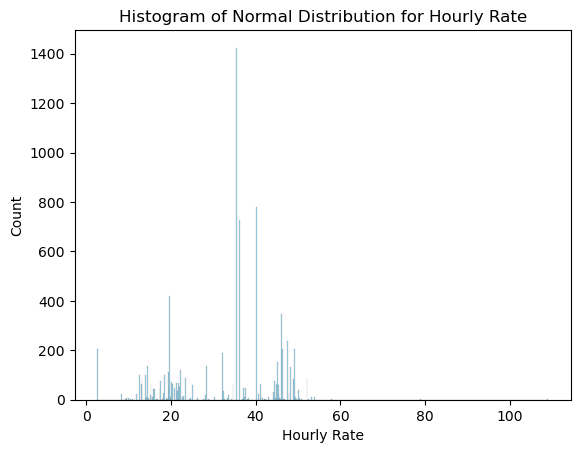

In [27]:
sns.histplot(df2["Hourly Rate"], color="skyblue", bins=500)
plt.title("Histogram of Normal Distribution for Hourly Rate")

In [28]:
statistic,shapiro_p_value = st.shapiro(df2["Hourly Rate"])
statistic,shapiro_p_value

C:\Users\Oscar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.930728554725647, 0.0)

In [29]:
# print the test result as shapiro information-test imply: For N > 5000 the W test statistic is accurate, but the p-value may not be.

if statistic > 0.9:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is  significantly different from a normal distribution.')

The test results indicate that the distribution of prices is not significantly different from a normal distribution.


Shaphiro test insights: If the p-value is "small" - that is, if there is a low probability of
sampling data from a normally distributed population that produces such an
extreme value of the statistic - this may be taken as evidence against
the null hypothesis in favor of the alternative: the observations were not
drawn from a normal distribution.

In [30]:
sample_mean_hourly_wage = np.mean(df2["Hourly Rate"])
sem = st.sem(df2["Hourly Rate"])
dof = df2["Hourly Rate"].shape[0]-1

In [31]:
sample_mean_hourly_wage

32.78855771628024

In [32]:
ci_lower, ci_upper = st.t.interval(0.95, dof, loc=sample_mean_hourly_wage, scale=sem)
set_ci = (ci_lower, ci_upper)

In [33]:
print(f'Confidence interval for the mean of Hourly Rate column is: {set_ci}')

Confidence interval for the mean of Hourly Rate column is: (32.52345834488425, 33.05365708767623)


Other transformations with less accurate results with Shaphiro test:

In [34]:
dfsqrt = np.sqrt(df2["Hourly Rate"])

In [35]:
statistic,shapiro_p_value = st.shapiro(dfsqrt)
statistic,shapiro_p_value

(0.8848538398742676, 0.0)

In [36]:
dcbrt = np.cbrt(df2["Hourly Rate"])

In [37]:
statistic,shapiro_p_value = st.shapiro(dcbrt)
statistic,shapiro_p_value

(0.8543292284011841, 0.0)

In [38]:
dflog = np.log(df2["Hourly Rate"])

In [39]:
statistic,shapiro_p_value = st.shapiro(dflog)
statistic,shapiro_p_value

(0.7598218321800232, 0.0)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [40]:
df3 = df3[(df3["Department"] == "POLICE") & (df3["Salary or Hourly"] == "Salary")]["Annual Salary"]

Text(0.5, 1.0, 'Histogram of Normal Distribution for all salaried employeed in the Police')

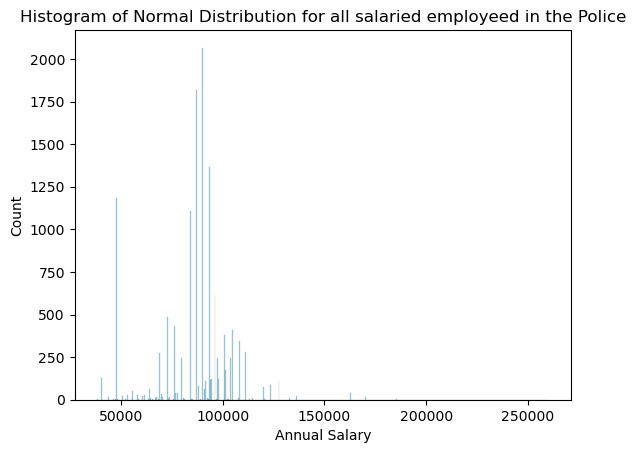

In [41]:
sns.histplot(df3, color="skyblue", bins=500)
plt.title("Histogram of Normal Distribution for all salaried employeed in the Police")


In [42]:
_,shapiro_p_value = st.shapiro(df3)
_,shapiro_p_value

C:\Users\Oscar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8964805603027344, 0.0)

In [43]:
# print the test result as shapiro information-test imply: For N > 5000 the W test statistic is accurate, but the p-value may not be.

if statistic > 0.9:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is  significantly different from a normal distribution.')

The test results indicate that the distribution of prices is  significantly different from a normal distribution.


In [44]:
dfsqrt2 = np.sqrt(df3)
dfcbrt2 = np.cbrt(df3)
dflog2 = np.log(df3)

In [45]:
statistic,shapiro_p_value = st.shapiro(dfsqrt2)
statistic,shapiro_p_value

(0.8764613270759583, 0.0)

In [46]:
statistic,shapiro_p_value = st.shapiro(dfcbrt2)
statistic,shapiro_p_value

(0.8655380010604858, 0.0)

In [47]:
statistic,shapiro_p_value = st.shapiro(dflog2)
statistic,shapiro_p_value

(0.8389468193054199, 0.0)

Shaphiro test insights: If the p-value is "small" - that is, if there is a low probability of sampling data from a normally distributed population that produces such an extreme value of the statistic - this may be taken as evidence against the null hypothesis in favor of the alternative: the observations were not drawn from a normal distribution.


However, in this case, the statistic of df3 is very close to the marked threshold of 0.9, and what is truly important is for it to be close to one. Therefore, assuming that the effect of the p-value against the null hypothesis is more likely for the calculation of these confidence intervals, we consider the probability for rejecting the null hypothesis to remain low, given that the population consists of more than 5000 elements.

In [48]:
sample_mean_annual_salary = np.mean(df3)
sem2 = st.sem(df3)
dof2 = dfsqrt.shape[0]-1

In [49]:
ci_lower2, ci_upper2 = st.t.interval(0.95, dof2, loc=sample_mean_annual_salary, scale=sem2)
ci_lower2, ci_upper2

(86177.03756732497, 86795.79143894181)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.